In [5]:
import pandas as pd
import time
import json
import numpy as np
import ast
import datetime
import collections
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

Open your files in Jupyer notebook

In [10]:
df1 = pd.read_csv('stopmasques2107.csv', encoding='utf-8', engine='python')
df2 = pd.read_csv('stopmasques.csv', encoding='utf-8', engine='python')

Concatenate or merge the two dataframes

In [11]:
df = pd.concat([df1, df2])

Get basic statistical info on the dataset

In [12]:
df.describe()

,tweet_id,retweet_count,followers_count,friends_count,ratio,month_age_accounts
count,1.660000e+03,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000
mean,1.288281e+18,77.778916,984.059639,983.633735,9.279236,48.852244
std,1.571931e+15,124.911049,2904.268762,2638.803815,200.903739,41.525845
min,1.285410e+18,0.000000,0.000000,0.000000,0.000000,0.098565
25%,1.286758e+18,1.000000,94.000000,109.000000,1.299311,6.472412
50%,1.288698e+18,8.000000,215.000000,280.000000,1.927784,38.177375
75%,1.289555e+18,93.000000,726.500000,947.750000,2.945205,82.745026
max,1.290639e+18,333.000000,43035.000000,50973.000000,7776.000000,151.296741


Get the number of rows

In [16]:
df.shape

(1660, 28)

Get the most shared posts from the dataset

In [17]:
top_posts = df[['screen_name', 'tweet_text','tweet_id', 'created_at', 'retweet_count']].drop_duplicates(['tweet_text'], keep='first')
top_posts.sort_values(by='retweet_count', ascending=False).head(10)


,screen_name,tweet_text,tweet_id,created_at,retweet_count
619,Lilly_buffiere,Petite question si la France était réellement ...,1289487375991619591,2020-08-01 09:05:22,333
35,PierreClaudine4,RT @Lilly_buffiere: Petite question si la Fran...,1290517308759212032,2020-08-04 05:17:57,333
238,samthesaint999,RT @MEMEPLUSULTRA: Le drapeau du Nouvel Ordre ...,1289854562627489793,2020-08-02 09:24:26,122
872,Lilly_buffiere,Il est temps de les poser sur la table ! 🙏\n#C...,1288577193900212225,2020-07-29 20:48:38,114
0,denislamalis,RT @Lilly_buffiere: Il est temps de les poser ...,1290639431200890880,2020-08-04 13:23:13,114
304,remake_j,RT @ElianeCarrier: Les masques ne protègent pa...,1286309265532162059,2020-07-23 14:36:42,93
198,Herv82492581,"RT @8MarcellaSantos: Donc pas de 2eme vague, v...",1286997341396971521,2020-07-25 12:10:52,71
102,PierreClaudine4,RT @ElianeCarrier: Masque porté par les chirur...,1287481441358684165,2020-07-26 20:14:30,69
494,ElianeCarrier,Masque porté par les chirurgiens :\nLe sas où ...,1285814674643181568,2020-07-22 05:51:22,69
1012,ddg7893,Il y a 400000 à 600000 pneumonies par an en Fr...,1288090047619661825,2020-07-28 12:32:53,51


## Filter by dates

Change the time stamp for the tweet creation date and for the accounts creation date to month

In [19]:
df['date'] = pd.to_datetime(df['created_at'])
df.dtypes

created_at                                  object
tweet_id                                     int64
retweet_count                                int64
tweet_text                                  object
hashtags                                    object
urls                                        object
language                                    object
screen_name                                 object
name                                        object
account_creation_date                       object
followers_count                              int64
friends_count                                int64
location                                    object
user_description                            object
original_tweet_text                         object
original_tweet_user_screen_name             object
original_tweet_user_location                object
original_tweet_user_description             object
original_tweet_user_created_at              object
original_user_account_created_a

In [21]:
df.sort_values("created_at", ascending=False).head()

,created_at,tweet_id,retweet_count,tweet_text,hashtags,urls,language,screen_name,name,account_creation_date,...,original_user_account_created_at,day,minute,hour,account_creation_day,bio_tags,ratio,suspect,month_age_accounts,date
0,2020-08-04 13:23:13,1290639431200890880,114,RT @Lilly_buffiere: Il est temps de les poser ...,"['COVID__19', 'StopMasques', 'StopDictatureSan...",[],fr,denislamalis,superdenis,Thu Jan 11 12:29:00 +0000 2018,...,2020-04-20 19:59:51,2020-08-04 00:00:00,2020-08-04 13:23:00,2020-08-04 13:00:00,2018-01-11 00:00:00,[],3.666667,fine,30.752172,2020-08-04 13:23:13
1,2020-08-04 12:11:00,1290621254324674560,5,RT @NicoleDelepine: doc vont-ils les traiter d...,['StopMasques'],[],fr,Narowenn,Narowenn,Thu Sep 03 10:45:08 +0000 2015,...,2011-12-25 14:45:13,2020-08-04 00:00:00,2020-08-04 12:11:00,2020-08-04 12:00:00,2015-09-03 00:00:00,"['LIBRE', 'VousNePasserezPas', 'No5G']",1.028902,sketchyAF,59.040227,2020-08-04 12:11:00
2,2020-08-04 12:04:53,1290619715690401793,1,RT @MediaRacine: #StopDictatureSanitaire\n#Sto...,"['StopDictatureSanitaire', 'StopTyrannieSanita...",[],fr,HuitValerie,Huit Valerie,Sat Apr 25 07:09:44 +0000 2020,...,2020-04-19 08:21:51,2020-08-04 00:00:00,2020-08-04 12:04:00,2020-08-04 12:00:00,2020-04-25 00:00:00,[],1.200000,fine,3.318343,2020-08-04 12:04:53
3,2020-08-04 12:00:20,1290618571698176002,1,#StopDictatureSanitaire\n#StopTyrannieSanitair...,"['StopDictatureSanitaire', 'StopTyrannieSanita...",['https://twitter.com/i/web/status/12906185716...,fr,MediaRacine,MediaRacine ✚,Sun Apr 19 08:21:51 +0000 2020,...,NaN,2020-08-04 00:00:00,2020-08-04 12:00:00,2020-08-04 12:00:00,2020-04-19 00:00:00,"['Localisme', 'Montcalm']",1.822917,fine,3.515473,2020-08-04 12:00:20
4,2020-08-04 11:30:00,1290610937628635136,5,RT @NicoleDelepine: doc vont-ils les traiter d...,['StopMasques'],[],fr,nangstef,Infantolino nangstef,Tue Feb 04 22:57:20 +0000 2020,...,2011-12-25 14:45:13,2020-08-04 00:00:00,2020-08-04 11:30:00,2020-08-04 11:00:00,2020-02-04 00:00:00,[],3.136364,fine,5.979589,2020-08-04 11:30:00


In [22]:
df['account_creation_date_month'] = (pd.to_datetime(pd.to_datetime(df.account_creation_date)
                                                     .apply(lambda x: x.strftime('%Y-%m'))))
df

,created_at,tweet_id,retweet_count,tweet_text,hashtags,urls,language,screen_name,name,account_creation_date,...,day,minute,hour,account_creation_day,bio_tags,ratio,suspect,month_age_accounts,date,account_creation_date_month
0,2020-07-28 09:19:50,1288041465017438208,0,@renaudpila #Masquarade #StopMasques,"['Masquarade', 'StopMasques']",[],und,pilouerre,Pierre-Louis Stevance 🇫🇷🇪🇺,Mon Dec 06 10:26:42 +0000 2010,...,2020-07-28 00:00:00,2020-07-28 09:19:00,2020-07-28 09:00:00,2010-12-06 00:00:00,[],4.098039,fine,115.714902,2020-07-28 09:19:50,2010-12-01
1,2020-07-28 08:42:56,1288032180053118982,0,@Conflits_FR Fakes News #liberté #stopmasque #...,"['liberté', 'stopmasque', 'StopMasques']",[],en,PascaleAckerma1,Pascale Ackermann,Mon Jan 20 19:10:46 +0000 2020,...,2020-07-28 00:00:00,2020-07-28 08:42:00,2020-07-28 08:00:00,2020-01-20 00:00:00,"['liberté', 'stopconfinement']",2.914894,fine,6.242428,2020-07-28 08:42:56,2020-01-01
2,2020-07-28 06:52:16,1288004328549167104,1,RT @MediaRacine: #StopDictatureSanitaire\n#Sto...,"['StopDictatureSanitaire', 'StopMasques']",[],fr,miss7terre,Gaï Rde †ن,Sun Nov 30 14:56:07 +0000 2014,...,2020-07-28 00:00:00,2020-07-28 06:52:00,2020-07-28 06:00:00,2014-11-30 00:00:00,[],3.852090,fine,67.911045,2020-07-28 06:52:16,2014-11-01
3,2020-07-28 06:43:16,1288002064178655233,0,Surveillance \nDiscipline\nSoumission \nDistan...,[],"['https://youtu.be/I6Ffr1U7KMY', 'https://twit...",fr,GodeauEric,Eric Godeau ☧,Mon Mar 10 07:07:40 +0000 2014,...,2020-07-28 00:00:00,2020-07-28 06:43:00,2020-07-28 06:00:00,2014-03-10 00:00:00,[],2.652778,fine,76.617590,2020-07-28 06:43:16,2014-03-01
4,2020-07-28 06:38:21,1288000826288549889,0,Si quelqu'un vous dit que vous devez porter un...,[],['https://twitter.com/i/web/status/12880008262...,fr,RaymondTommy8,Patriote Français,Sat Apr 11 13:55:05 +0000 2020,...,2020-07-28 00:00:00,2020-07-28 06:38:00,2020-07-28 06:00:00,2020-04-11 00:00:00,[],3.571429,fine,3.548327,2020-07-28 06:38:21,2020-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,2020-07-28 06:38:21,1288000826288549889,0,Si quelqu'un vous dit que vous devez porter un...,[],['https://twitter.com/i/web/status/12880008262...,fr,RaymondTommy8,Patriote Français,Sat Apr 11 13:55:05 +0000 2020,...,2020-07-28 00:00:00,2020-07-28 06:38:00,2020-07-28 06:00:00,2020-04-11 00:00:00,[],3.571429,fine,3.778312,2020-07-28 06:38:21,2020-04-01
1022,2020-07-28 06:29:37,1287998627240181760,0,#BasLesMasques #StopMasques #StopConfinement ...,"['BasLesMasques', 'StopMasques', 'StopConfinem...",['https://twitter.com/i/web/status/12879986272...,fr,AlainGuillaume1,Résistant,Sun Jun 26 10:09:17 +0000 2011,...,2020-07-28 00:00:00,2020-07-28 06:29:00,2020-07-28 06:00:00,2011-06-26 00:00:00,[],8.000000,fine,109.308199,2020-07-28 06:29:37,2011-06-01
1023,2020-07-28 05:55:55,1287990145980026880,1,"""Les experts Chinois ont conseillé l'#OMS de n...",['OMS'],['https://twitter.com/i/web/status/12879901459...,fr,JusticeEtLoi,"🗣 Liberté, Justice et Loi",Tue Sep 05 12:16:38 +0000 2017,...,2020-07-28 00:00:00,2020-07-28 05:55:00,2020-07-28 05:00:00,2017-09-05 00:00:00,"['LibreDeChoisir', 'PeupleLibre']",1.614887,fine,34.957597,2020-07-28 05:55:55,2017-09-01
1024,2020-07-28 05:37:27,1287985500138221568,1,"Et voilà qu'est apparu le masque chirurgical, ...",[],['https://twitter.com/i/web/status/12879855001...,fr,pioupioutwittou,p1⃣¥oنp1⃣¥oن ZaЯΔ0⃣Za 😎,Sun Sep 06 11:25:28 +0000 2015,...,2020-07-28 00:00:00,2020-07-28 05:37:00,2020-07-28 05:00:00,2015-09-06 00:00:00,[],5.401961,fine,58.941662,2020-07-28 05:37:27,2015-09-01


## Accounts

Get the top accounts in the dataset

In [33]:
df.screen_name.value_counts().head(10).reset_index()

,index,screen_name
0,Floppydisk8,69
1,PierreClaudine4,65
2,babtoufrai,43
3,PascaleAckerma1,35
4,Sankukai11,31
5,ElianeCarrier,25
6,LetUsComment,25
7,MediaRacine,25
8,36quai_or,23
9,moutonn68125861,22


Count how many individual accounts in the dataframe

In [34]:
accounts = df.copy()
accounts = accounts.drop_duplicates(['screen_name'], keep='first')

In [35]:
accounts.shape[0]

787

See when the accounts were created to see if there is anything fishy

In [36]:
accounts.account_creation_date_month.value_counts().head(20)

2020-04-01    61
2020-03-01    36
2020-05-01    28
2020-07-01    26
2020-06-01    17
2020-02-01    15
2018-12-01    15
2017-05-01    14
2012-02-01    13
2017-03-01    12
2017-02-01    12
2018-11-01    11
2020-01-01    10
2012-01-01    10
2012-04-01     9
2016-02-01     9
2014-01-01     9
2013-05-01     9
2019-07-01     9
2015-09-01     8
Name: account_creation_date_month, dtype: int64

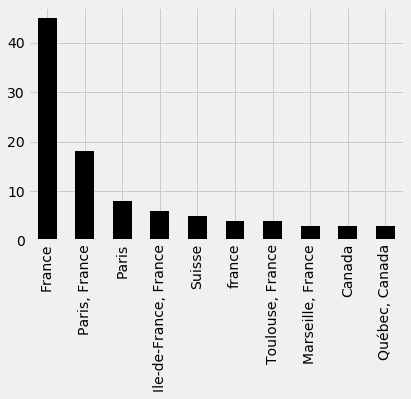

In [38]:
accounts['location'].value_counts().head(10).plot(kind='bar',x='place',y='number', color ='black')

# Calculate top hashtags and mentions in text

Use a bit of regex to parse out the hashtags in the tweets, create a column and then visualize them

In [7]:
import re
df3 = pd.read_csv('stopmasquesDEF.csv', encoding='utf-8', engine='python')
df3['hashtags'] = df3['tweet'].apply(lambda x: str(re.findall(r"#(\w+)", str(x))))

In [8]:
def hashtags(col):
    
    col = col.apply(lambda x: ast.literal_eval(x))
    
    def mapper(s):
        all_vals = list()

        for l in s:
            [all_vals.append(x.lower()) for x in l]

        all_vals.sort()
        return all_vals

    def reducer(l):
        all_counts = dict()
        prev = l[0]
        count = 0

        for x in l:
            if x == prev:
                count = count + 1
            else:
                all_counts[prev] = count
                prev = x
                count = 1      

        all_counts[prev] = count

        return all_counts
    
    mapped = mapper(col)
    reduced = reducer(mapped)
    reduced = dict(sorted(reduced.items(), key=lambda x: x[1], reverse=True))
    
    df3 = pd.DataFrame(list(reduced.items()), columns=['hashtag', 'number']).head(20).sort_values('number', ascending=True)
    return df3

def bar_chart(tags, number, title):
    plt.figure(figsize=(10,5))
    plt.barh(tags, number)
    plt.title(title)
    plt.xlabel('number of times hashtag appeared')
    plt.show()

In [9]:
new = df3[df3.hashtags.map(lambda x: len(x) >= 1)]
tags = hashtags(new.hashtags)

In [10]:
tags = tags[tags.hashtag != 'stopmasques']
tags.head(20)

,hashtag,number
19,covid__19,22
17,covidiots,24
18,nomasks,24
16,stopcovid,25
15,masquesobligatoires,27
14,id2020,30
13,baslesmasques,30
12,statescandal,31
11,reveillezvous,31
10,onnoublierapas,33


Visualize the top hashtags in the datasert

<Figure size 720x360 with 0 Axes>

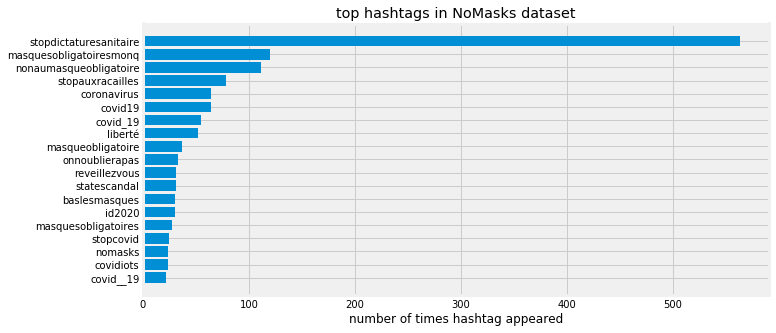

In [11]:
plt.figure(figsize=(10,5))
bar_chart(tags.hashtag, tags.number, 'top hashtags in NoMasks dataset')

Repeat the same process with mentions in the tweets and create a new column

In [45]:
df['tags'] = df['tweet_text'].apply(lambda x: str(re.findall(r"@(\w+)", str(x))))
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x))
type(df.iloc[0].tags)

list

In [46]:
df['tags'] = [str(i).lower() for i in df['tags']]
df.head(5)

,created_at,tweet_id,retweet_count,tweet_text,hashtags,urls,language,screen_name,name,account_creation_date,...,minute,hour,account_creation_day,bio_tags,ratio,suspect,month_age_accounts,date,account_creation_date_month,tags
0,2020-07-28 09:19:50,1288041465017438208,0,@renaudpila #Masquarade #StopMasques,"['Masquarade', 'StopMasques']",[],und,pilouerre,Pierre-Louis Stevance 🇫🇷🇪🇺,Mon Dec 06 10:26:42 +0000 2010,...,2020-07-28 09:19:00,2020-07-28 09:00:00,2010-12-06 00:00:00,[],4.098039,fine,115.714902,2020-07-28 09:19:50,2010-12-01,['renaudpila']
1,2020-07-28 08:42:56,1288032180053118982,0,@Conflits_FR Fakes News #liberté #stopmasque #...,"['liberté', 'stopmasque', 'StopMasques']",[],en,PascaleAckerma1,Pascale Ackermann,Mon Jan 20 19:10:46 +0000 2020,...,2020-07-28 08:42:00,2020-07-28 08:00:00,2020-01-20 00:00:00,"['liberté', 'stopconfinement']",2.914894,fine,6.242428,2020-07-28 08:42:56,2020-01-01,['conflits_fr']
2,2020-07-28 06:52:16,1288004328549167104,1,RT @MediaRacine: #StopDictatureSanitaire\n#Sto...,"['StopDictatureSanitaire', 'StopMasques']",[],fr,miss7terre,Gaï Rde †ن,Sun Nov 30 14:56:07 +0000 2014,...,2020-07-28 06:52:00,2020-07-28 06:00:00,2014-11-30 00:00:00,[],3.852090,fine,67.911045,2020-07-28 06:52:16,2014-11-01,['mediaracine']
3,2020-07-28 06:43:16,1288002064178655233,0,Surveillance \nDiscipline\nSoumission \nDistan...,[],"['https://youtu.be/I6Ffr1U7KMY', 'https://twit...",fr,GodeauEric,Eric Godeau ☧,Mon Mar 10 07:07:40 +0000 2014,...,2020-07-28 06:43:00,2020-07-28 06:00:00,2014-03-10 00:00:00,[],2.652778,fine,76.617590,2020-07-28 06:43:16,2014-03-01,[]
4,2020-07-28 06:38:21,1288000826288549889,0,Si quelqu'un vous dit que vous devez porter un...,[],['https://twitter.com/i/web/status/12880008262...,fr,RaymondTommy8,Patriote Français,Sat Apr 11 13:55:05 +0000 2020,...,2020-07-28 06:38:00,2020-07-28 06:00:00,2020-04-11 00:00:00,[],3.571429,fine,3.548327,2020-07-28 06:38:21,2020-04-01,[]


In [52]:
def mention(col):
    col = col.apply(lambda x: ast.literal_eval(x))
    
    def mapper(s):
        all_vals = list()

        for l in s:
            [all_vals.append(x) for x in l]

        all_vals.sort()
        return all_vals

    def reducer(l):
        all_counts = dict()
        prev = l[0]
        count = 0

        for x in l:
            if x == prev:
                count = count + 1
            else:
                all_counts[prev] = count
                prev = x
                count = 1      

        all_counts[prev] = count

        return all_counts
    
    mapped = mapper(col)
    reduced = reducer(mapped)
    reduced = dict(sorted(reduced.items(), key=lambda x: x[1], reverse=True))
    
    df = pd.DataFrame(list(reduced.items()), columns=['tags', 'number']).head(150).sort_values('number', ascending=False)
    return df

In [53]:
tags_m = mention(df.tags)
tags_m

,tags,number
0,lilly_buffiere,414
1,elianecarrier,121
2,ddg7893,106
3,deltaplan,80
4,floppydisk8,45
...,...,...
125,cvidee,2
126,desertup,2
127,detenu6202000,2
128,divizio1,2


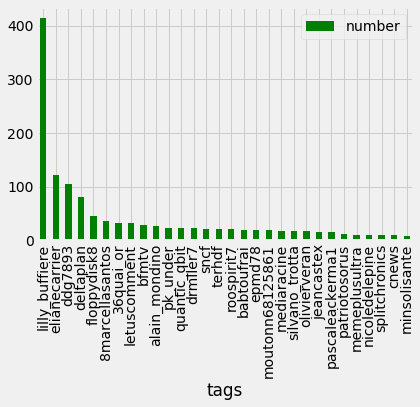

In [54]:
tags_m.head(30).plot(kind='bar',x='tags',y='number', color ='green')

# Calculating the top hashtags in the users description

In [55]:
import re
accounts['hashtags_user_descriptions'] = accounts['user_description'].apply(lambda x: str(re.findall(r"#(\w+)", str(x))))
accounts['hashtags_user_descriptions'] = accounts['hashtags_user_descriptions'].apply(lambda x: ast.literal_eval(x))
type(accounts.iloc[0].hashtags_user_descriptions)

list

In [56]:
accounts['hashtags_user_descriptions'] = [str(i).lower() for i in accounts['hashtags_user_descriptions']]
accounts.head(5)

,created_at,tweet_id,retweet_count,tweet_text,hashtags,urls,language,screen_name,name,account_creation_date,...,minute,hour,account_creation_day,bio_tags,ratio,suspect,month_age_accounts,date,account_creation_date_month,hashtags_user_descriptions
0,2020-07-28 09:19:50,1288041465017438208,0,@renaudpila #Masquarade #StopMasques,"['Masquarade', 'StopMasques']",[],und,pilouerre,Pierre-Louis Stevance 🇫🇷🇪🇺,Mon Dec 06 10:26:42 +0000 2010,...,2020-07-28 09:19:00,2020-07-28 09:00:00,2010-12-06 00:00:00,[],4.098039,fine,115.714902,2020-07-28 09:19:50,2010-12-01,[]
1,2020-07-28 08:42:56,1288032180053118982,0,@Conflits_FR Fakes News #liberté #stopmasque #...,"['liberté', 'stopmasque', 'StopMasques']",[],en,PascaleAckerma1,Pascale Ackermann,Mon Jan 20 19:10:46 +0000 2020,...,2020-07-28 08:42:00,2020-07-28 08:00:00,2020-01-20 00:00:00,"['liberté', 'stopconfinement']",2.914894,fine,6.242428,2020-07-28 08:42:56,2020-01-01,"['liberté', 'stopconfinement']"
2,2020-07-28 06:52:16,1288004328549167104,1,RT @MediaRacine: #StopDictatureSanitaire\n#Sto...,"['StopDictatureSanitaire', 'StopMasques']",[],fr,miss7terre,Gaï Rde †ن,Sun Nov 30 14:56:07 +0000 2014,...,2020-07-28 06:52:00,2020-07-28 06:00:00,2014-11-30 00:00:00,[],3.852090,fine,67.911045,2020-07-28 06:52:16,2014-11-01,[]
3,2020-07-28 06:43:16,1288002064178655233,0,Surveillance \nDiscipline\nSoumission \nDistan...,[],"['https://youtu.be/I6Ffr1U7KMY', 'https://twit...",fr,GodeauEric,Eric Godeau ☧,Mon Mar 10 07:07:40 +0000 2014,...,2020-07-28 06:43:00,2020-07-28 06:00:00,2014-03-10 00:00:00,[],2.652778,fine,76.617590,2020-07-28 06:43:16,2014-03-01,[]
4,2020-07-28 06:38:21,1288000826288549889,0,Si quelqu'un vous dit que vous devez porter un...,[],['https://twitter.com/i/web/status/12880008262...,fr,RaymondTommy8,Patriote Français,Sat Apr 11 13:55:05 +0000 2020,...,2020-07-28 06:38:00,2020-07-28 06:00:00,2020-04-11 00:00:00,[],3.571429,fine,3.548327,2020-07-28 06:38:21,2020-04-01,[]


In [57]:
def hashing(col):
    col = col.apply(lambda x: ast.literal_eval(x))
    
    def mapper(s):
        all_vals = list()

        for l in s:
            [all_vals.append(x) for x in l]

        all_vals.sort()
        return all_vals

    def reducer(l):
        all_counts = dict()
        prev = l[0]
        count = 0

        for x in l:
            if x == prev:
                count = count + 1
            else:
                all_counts[prev] = count
                prev = x
                count = 1      

        all_counts[prev] = count

        return all_counts
    
    mapped = mapper(col)
    reduced = reducer(mapped)
    reduced = dict(sorted(reduced.items(), key=lambda x: x[1], reverse=True))
    
    accounts = pd.DataFrame(list(reduced.items()), columns=['hashtags_user_descriptions', 'number']).head(150).sort_values('number', ascending=False)
    return accounts

In [58]:
tags1 = hashing(accounts.hashtags_user_descriptions)
tags1.head(20)

,hashtags_user_descriptions,number
0,liberté,9
1,teampatriotes,8
2,frexit,4
3,teampatriote,4
4,jambonbeurre,3
5,jesuispatriote,3
6,libredechoisir,3
7,stopdictaturesanitaire,3
8,zemmour,3
16,parlerfrance,2


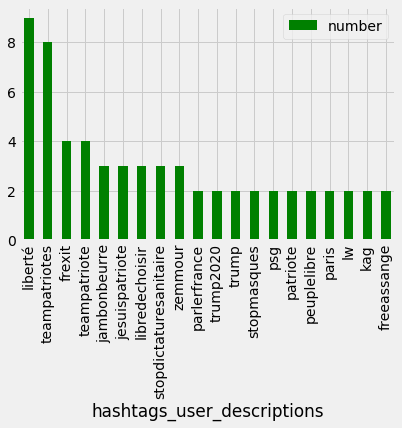

In [59]:
tags1 = hashing(accounts.hashtags_user_descriptions).head(20).plot(kind='bar',x='hashtags_user_descriptions',y='number', color ='green')

In [60]:
import re
df['tags_user_descriptions'] = df['user_description'].apply(lambda x: str(re.findall(r"@(\w+)", str(x))))
df['tags_user_descriptions'] = df['tags_user_descriptions'].apply(lambda x: ast.literal_eval(x))
type(df.iloc[0].tags_user_descriptions)

list

In [61]:
df['tags_user_descriptions'] = [str(i).lower() for i in df['tags_user_descriptions']]
df.head(5)

,created_at,tweet_id,retweet_count,tweet_text,hashtags,urls,language,screen_name,name,account_creation_date,...,hour,account_creation_day,bio_tags,ratio,suspect,month_age_accounts,date,account_creation_date_month,tags,tags_user_descriptions
0,2020-07-28 09:19:50,1288041465017438208,0,@renaudpila #Masquarade #StopMasques,"['Masquarade', 'StopMasques']",[],und,pilouerre,Pierre-Louis Stevance 🇫🇷🇪🇺,Mon Dec 06 10:26:42 +0000 2010,...,2020-07-28 09:00:00,2010-12-06 00:00:00,[],4.098039,fine,115.714902,2020-07-28 09:19:50,2010-12-01,['renaudpila'],"['nicolassarkozy', 'lesrepublicains']"
1,2020-07-28 08:42:56,1288032180053118982,0,@Conflits_FR Fakes News #liberté #stopmasque #...,"['liberté', 'stopmasque', 'StopMasques']",[],en,PascaleAckerma1,Pascale Ackermann,Mon Jan 20 19:10:46 +0000 2020,...,2020-07-28 08:00:00,2020-01-20 00:00:00,"['liberté', 'stopconfinement']",2.914894,fine,6.242428,2020-07-28 08:42:56,2020-01-01,['conflits_fr'],[]
2,2020-07-28 06:52:16,1288004328549167104,1,RT @MediaRacine: #StopDictatureSanitaire\n#Sto...,"['StopDictatureSanitaire', 'StopMasques']",[],fr,miss7terre,Gaï Rde †ن,Sun Nov 30 14:56:07 +0000 2014,...,2020-07-28 06:00:00,2014-11-30 00:00:00,[],3.852090,fine,67.911045,2020-07-28 06:52:16,2014-11-01,['mediaracine'],[]
3,2020-07-28 06:43:16,1288002064178655233,0,Surveillance \nDiscipline\nSoumission \nDistan...,[],"['https://youtu.be/I6Ffr1U7KMY', 'https://twit...",fr,GodeauEric,Eric Godeau ☧,Mon Mar 10 07:07:40 +0000 2014,...,2020-07-28 06:00:00,2014-03-10 00:00:00,[],2.652778,fine,76.617590,2020-07-28 06:43:16,2014-03-01,[],[]
4,2020-07-28 06:38:21,1288000826288549889,0,Si quelqu'un vous dit que vous devez porter un...,[],['https://twitter.com/i/web/status/12880008262...,fr,RaymondTommy8,Patriote Français,Sat Apr 11 13:55:05 +0000 2020,...,2020-07-28 06:00:00,2020-04-11 00:00:00,[],3.571429,fine,3.548327,2020-07-28 06:38:21,2020-04-01,[],[]


In [62]:
def menting(col):
    col = col.apply(lambda x: ast.literal_eval(x))
    
    def mapper(s):
        all_vals = list()

        for l in s:
            [all_vals.append(x) for x in l]

        all_vals.sort()
        return all_vals

    def reducer(l):
        all_counts = dict()
        prev = l[0]
        count = 0

        for x in l:
            if x == prev:
                count = count + 1
            else:
                all_counts[prev] = count
                prev = x
                count = 1      

        all_counts[prev] = count

        return all_counts
    
    mapped = mapper(col)
    reduced = reducer(mapped)
    reduced = dict(sorted(reduced.items(), key=lambda x: x[1], reverse=True))
    
    df = pd.DataFrame(list(reduced.items()), columns=['tags_user_descriptions', 'number']).head(150).sort_values('number', ascending=False)
    return df

In [63]:
tags1_m = menting(df.tags_user_descriptions)
tags1_m

,tags_user_descriptions,number
0,nicolassarkozy,18
1,lesrepublicains,17
2,jfpoisson78,5
3,mlp_officiel,5
4,brunogollnisch,4
5,jeanmessiha,4
6,parler_app,4
13,xrschweiz,2
12,oserlafrance,2
11,occrp,2


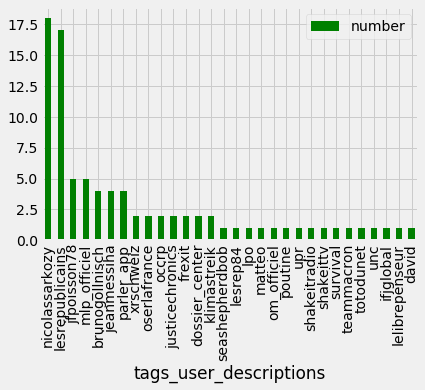

In [64]:
tags1_m.head(30).plot(kind='bar',x='tags_user_descriptions',y='number', color ='green')

In [ ]:
## Filter By Some Hashtags


# irexit = df['hashtags_tweet_text'] == 'irexit'
# df[irexit]